## Setup

In [1]:
## Setup
# Set up Colab to import data from Drive
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/ChuerYang_DataSci154/RearrestPrediction/'

# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Import data
df = pd.read_csv(file_path + 'RearrestPrediction_data.csv')

MessageError: Error: credential propagation was unsuccessful

## Data prep

In [ ]:
### Create a cleaned dataset
# keep only people with release==1 and non-missing value of rearrest
dfc = df[(df['release'] == 1) & (df['rearrest'].notna())]  # dfc refers to "cleaned" data frame

## Make new indicators
# Add indicator for charge_severity = "Felony"
dfc['felony_charge'] = (dfc['charge_severity'] == 'Felony').astype(int)

## Define features
X = ['age','male','black','white','nyc','violent','felony_charge','remand_requested','ror_requested','nmr_requested','no_release_requested','prior_vfo_cnt','prior_nonvfo_cnt','prior_misd_cnt','pending_vfo','pending_nonvfo','pending_misd']

## Impute missing values of x
# Create the imputer: strategy = 'most_frequent' uses the mode
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
# Do imputation by overwriting the X variables in dfc
dfc[X] = imputer.fit_transform(dfc[X])


<ipython-input-2-833e398cf2ee>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['felony_charge'] = (dfc['charge_severity'] == 'Felony').astype(int)
<ipython-input-2-833e398cf2ee>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc[X] = imputer.fit_transform(dfc[X])


In [ ]:
## Preview first 5 rows of data
dfc.head()

,age,male,white,black,judge_name,nyc,release,charge,charge_severity,charge_weight,...,nmr_requested,no_release_requested,prior_vfo_cnt,prior_nonvfo_cnt,prior_misd_cnt,pending_vfo,pending_nonvfo,pending_misd,rearrest,felony_charge
1,19.0,1.0,0.0,1.0,"Tubridy, Jennifer A.",1.0,1,Criminal Contempt,Misdemeanor,AM,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,40.0,1.0,1.0,0.0,"Battisti, Anthony M.",1.0,1,Larceny,Misdemeanor,AM,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
6,32.0,0.0,0.0,0.0,"Viscelli, Stephanie",0.0,1,DWI,Misdemeanor,UM,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,43.0,1.0,1.0,0.0,"Peacock, Seth J.",0.0,1,Larceny,Misdemeanor,AM,...,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
24,37.0,1.0,0.0,1.0,"Gershuny, Jeffrey A.",1.0,1,Assault,Misdemeanor,AM,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
## Present summary stats on the feature_cols variables in df_clean
dfc[X].describe()

,age,male,black,white,nyc,violent,felony_charge,remand_requested,ror_requested,nmr_requested,no_release_requested,prior_vfo_cnt,prior_nonvfo_cnt,prior_misd_cnt,pending_vfo,pending_nonvfo,pending_misd
count,80071.000000,80071.000000,80071.000000,80071.000000,80071.000000,80071.000000,80071.000000,80071.000000,80071.000000,80071.000000,80071.000000,80071.000000,80071.000000,80071.000000,80071.000000,80071.000000,80071.000000
mean,35.544429,0.762711,0.454884,0.413258,0.632963,0.071387,0.240999,0.002260,0.300733,0.051304,0.610383,0.133681,0.288844,1.133631,0.040801,0.092418,0.143785
std,12.308415,0.425424,0.497963,0.492421,0.482000,0.257471,0.427692,0.047491,0.458580,0.220619,0.487666,0.407484,0.756105,2.376113,0.197831,0.289617,0.350874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,33.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,43.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,10.000000,1.000000,1.000000,1.000000


## Predict rearrest

In [ ]:
## OLS prediction of rearrest
# OLS regression of rearrest on X
# Import statsmodels package for regressions
import statsmodels.formula.api as smf

# Run regression and print output
# Use OLS with robust standard errors (HC1). "join" restates the variable list with +, as needed for the regression call.
reg = smf.ols('rearrest ~ ' + ' + '.join(X), data=dfc).fit(cov_type='HC1')
print(reg.summary())

dfc['S_hat'] = reg.fittedvalues  # Predicted values

                            OLS Regression Results                            
Dep. Variable:               rearrest   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     240.6
Date:                Tue, 06 May 2025   Prob (F-statistic):               0.00
Time:                        00:15:44   Log-Likelihood:                -27331.
No. Observations:               80071   AIC:                         5.470e+04
Df Residuals:                   80053   BIC:                         5.486e+04
Df Model:                          17                                         
Covariance Type:                  HC1                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.1134 

<ipython-input-5-7ec786d9f17b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['S_hat'] = reg.fittedvalues  # Predicted values


Those with more pending misdemeanors are more likely to reoffend.
White and Black coefficients are statistically indistinguishable, they have the same rate of rearrest conditional on these features.
Men are 2 percentage points more likely to be arrested than women.

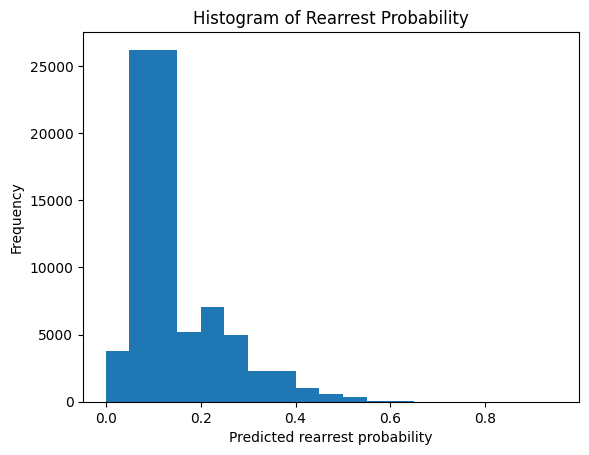

In [ ]:
## Plot distribution of predictions
plt.hist(dfc['S_hat'], bins=np.arange(start=0, stop=1, step=0.05))
plt.xlabel('Predicted rearrest probability')
plt.ylabel('Frequency')
plt.title('Histogram of Rearrest Probability')
plt.show()

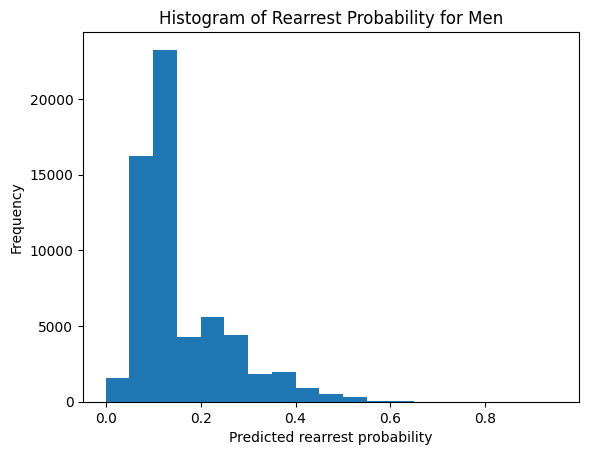

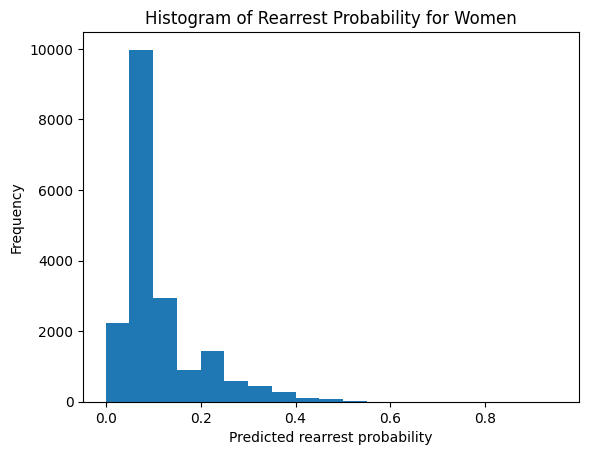

In [ ]:
## Plot distribution of predictions for men
plt.hist(dfc[dfc['male'] == 1]['S_hat'], bins=np.arange(start=0, stop=1, step=0.05))
plt.xlabel('Predicted rearrest probability')
plt.ylabel('Frequency')
plt.title('Histogram of Rearrest Probability for Men')
plt.show()

## Plot distribution of predictions for women
plt.hist(dfc[dfc['male'] == 0]['S_hat'], bins=np.arange(start=0, stop=1, step=0.05))
plt.xlabel('Predicted rearrest probability')
plt.ylabel('Frequency')
plt.title('Histogram of Rearrest Probability for Women')
plt.show()

Less women than men in the 40% bin

## Evaluating alternative definitions of fairness

### "Efficient" classifier: uniform threshold

In [ ]:
## Assume a threshold of S_hat > 0.2 is optimal for detention
  # (on the basis of assumptions about j and c parameters)

# Print overall detention rate, what share of the population has S_hat above 20%
# this is efficient but unfair by some definitions, detention rates will be different across genders

EfficientRate = round((dfc['S_hat'] > 0.2).mean(),3)
print(f"Under this assumption, it is efficient to detain share {EfficientRate} of people.")

## Are detention rates equal?
# Print detention rates by gender if use a 0.2 threshold for detaining
print(round((dfc[dfc['male'] == 1]['S_hat'] > 0.2).mean(),3))
print(round((dfc[dfc['male'] == 0]['S_hat'] > 0.2).mean(),3))

Under this assumption, it is efficient to detain share 0.233 of people.
0.258
0.154


25% of men will be detained at this threshold, but only 15% of women would be. If statistical parity was your definiton of fairness, this would be considered unfair.

### Fairness through unawareness

In [ ]:
## Get predictions from a regression without the male variable
X_nomale = [x for x in X if x != 'male']
reg = smf.ols('rearrest ~ ' + ' + '.join(X_nomale), data=dfc).fit(cov_type='HC1')
print(reg.summary())
dfc['S_hat_nomale'] = reg.fittedvalues  # Predicted values

## Ask whether average predictions are equal by group
print(dfc.groupby('male')['S_hat_nomale'].mean())

## Regress male on other X variables
reg = smf.ols('male ~ ' + ' + '.join(X_nomale), data=dfc).fit(cov_type='HC1')
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:               rearrest   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     251.0
Date:                Tue, 06 May 2025   Prob (F-statistic):               0.00
Time:                        00:15:46   Log-Likelihood:                -27358.
No. Observations:               80071   AIC:                         5.475e+04
Df Residuals:                   80054   BIC:                         5.491e+04
Df Model:                          16                                         
Covariance Type:                  HC1                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.1307 

<ipython-input-9-7f8e92b1b142>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['S_hat_nomale'] = reg.fittedvalues  # Predicted values


                            OLS Regression Results                            
Dep. Variable:                   male   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     462.2
Date:                Tue, 06 May 2025   Prob (F-statistic):               0.00
Time:                        00:15:47   Log-Likelihood:                -43517.
No. Observations:               80071   AIC:                         8.707e+04
Df Residuals:                   80054   BIC:                         8.723e+04
Df Model:                          16                                         
Covariance Type:                  HC1                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.8078 

Average rearrest probability for men is 15% but only 12% for women even though gender was taken out of the regression as a feature.
Regressing male on the other characteristics show that other features are highly predictive of being male. Removing the protected characteristic does not make it balanced.

### Statistical parity

0.21506493766291368
0.11855402927982649


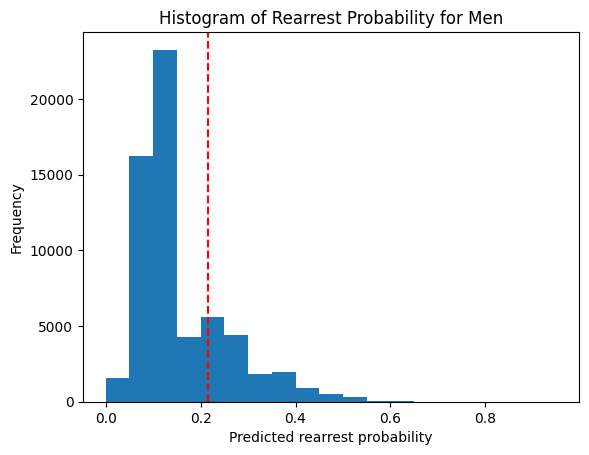

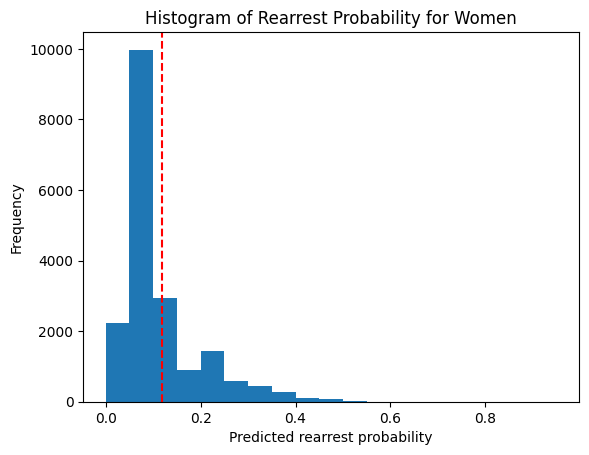

In [ ]:
## Imagine we want to detain an equal share of men and women
  # Share EfficientRate of each

## Determine the S threshold used for each group
# Male
s_HR_male = dfc[dfc['male'] == 1]['S_hat'].quantile(1-EfficientRate)
print(s_HR_male)

# Female
s_HR_female = dfc[dfc['male'] == 0]['S_hat'].quantile(1-EfficientRate)
print(s_HR_female)

## Display on S_hat histograms
# Male
plt.hist(dfc[dfc['male'] == 1]['S_hat'], bins=np.arange(start=0, stop=1, step=0.05))
plt.axvline(x=s_HR_male, color='r', linestyle='--')
plt.xlabel('Predicted rearrest probability')
plt.ylabel('Frequency')
plt.title('Histogram of Rearrest Probability for Men')
plt.show()

# Female
plt.hist(dfc[dfc['male'] == 0]['S_hat'], bins=np.arange(start=0, stop=1, step=0.05))
plt.axvline(x=s_HR_female, color='r', linestyle='--')
plt.xlabel('Predicted rearrest probability')
plt.ylabel('Frequency')
plt.title('Histogram of Rearrest Probability for Women')
plt.show()

Cutoff for women is lower than men, now we're detaining the same number of men and women.

#Data prep and define variables

In [ ]:
### Create a cleaned dataset
# keep only people with release==1 and non-missing value of rearrest
dfc = df[(df['release'] == 1) & (df['rearrest'].notna())]  # dfc refers to "cleaned" data frame

## Make new indicators
# Add indicator for charge_severity = "Felony"
dfc['felony_charge'] = (dfc['charge_severity'] == 'Felony').astype(int)

## Define features
X = ['age','nyc','violent','felony_charge','remand_requested','ror_requested','nmr_requested','no_release_requested','prior_vfo_cnt','prior_nonvfo_cnt','prior_misd_cnt','pending_vfo','pending_nonvfo','pending_misd']

## Impute missing values of x
# Create the imputer: strategy = 'most_frequent' uses the mode
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
# Do imputation by overwriting the X variables in dfc
dfc[X] = imputer.fit_transform(dfc[X])


<ipython-input-11-5cbfa30eb3f8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['felony_charge'] = (dfc['charge_severity'] == 'Felony').astype(int)
<ipython-input-11-5cbfa30eb3f8>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc[X] = imputer.fit_transform(dfc[X])


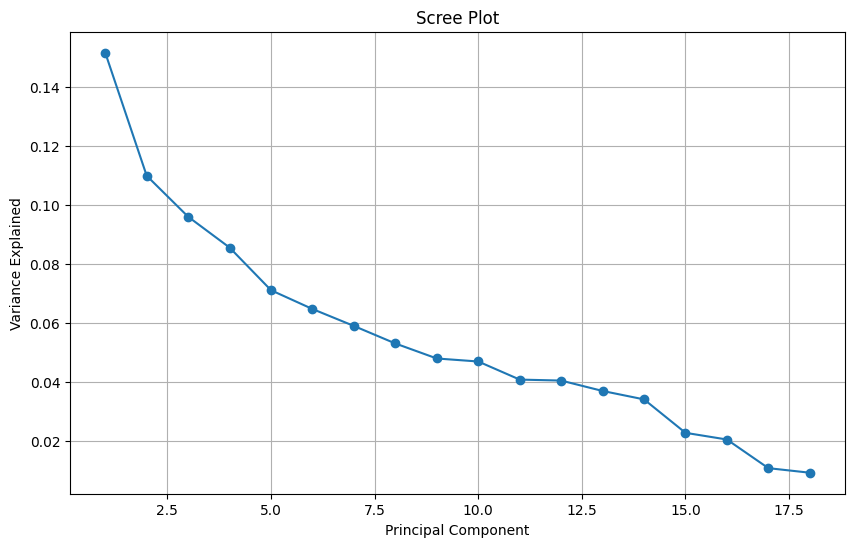

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

dfc
# Drop non-numeric or identifier columns
numeric_df = df.select_dtypes(include=['number']).dropna()

# Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# PCA
pca = PCA()
pca.fit(scaled_data)

# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid(True)
plt.show()


PCA finds orthogonal vectors (principal components) that explain the variance. PC1+ is the main reason behind the variance, as components go up, it explains less and less of the variance. First 5 explain 50% of the data, a lot of different directions explain the variance. there are a lot of interactions between the columns to explain variance in the individuals.

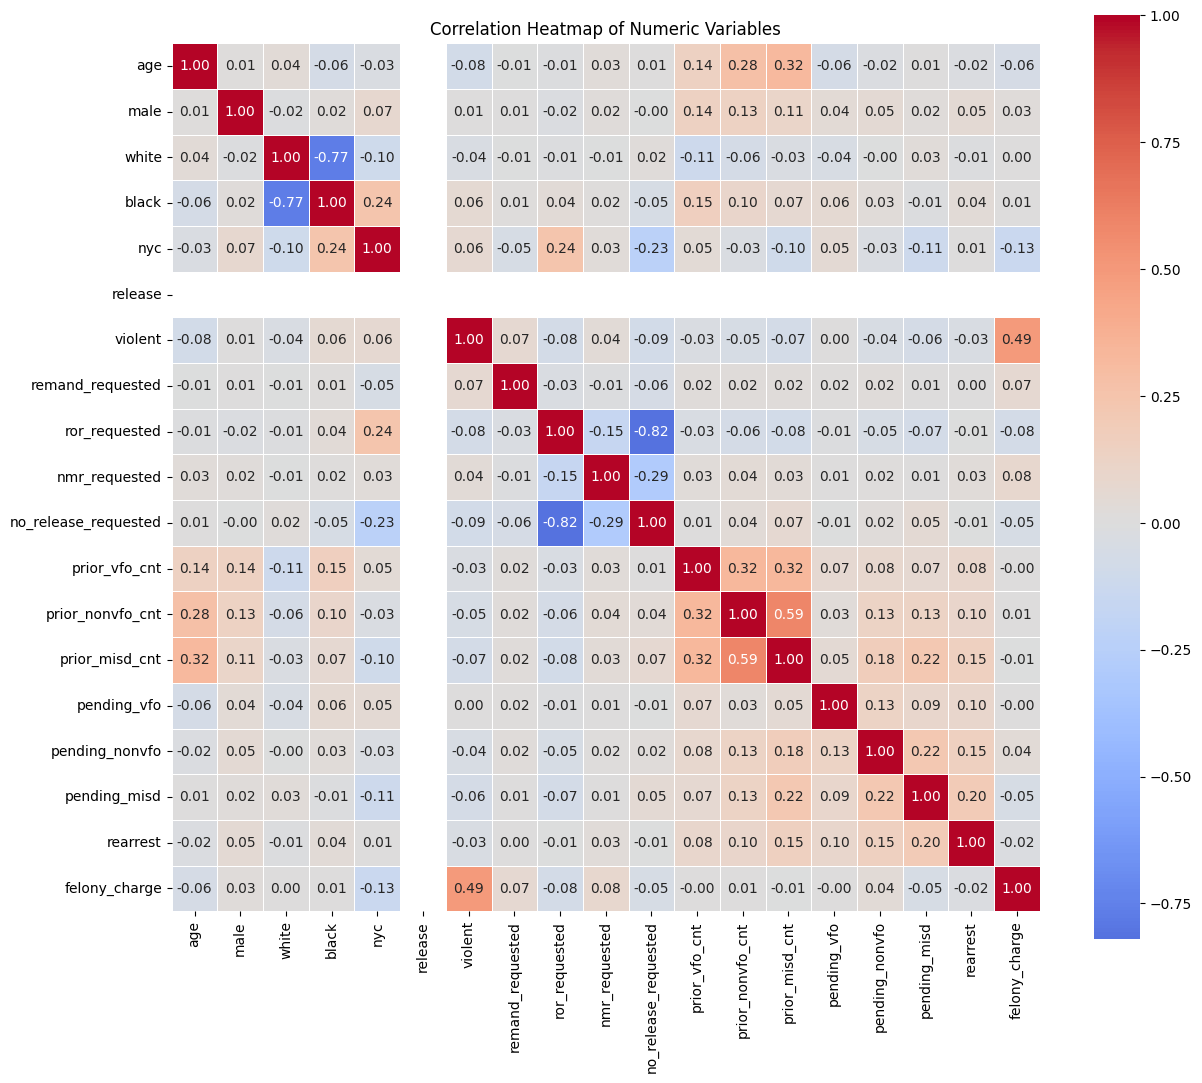

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data

# Select numeric columns only
numeric_df = dfc.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()


In [ ]:
dfc

,age,male,white,black,judge_name,nyc,release,charge,charge_severity,charge_weight,...,nmr_requested,no_release_requested,prior_vfo_cnt,prior_nonvfo_cnt,prior_misd_cnt,pending_vfo,pending_nonvfo,pending_misd,rearrest,felony_charge
1,19.0,1.0,0,1,"Tubridy, Jennifer A.",1.0,1,Criminal Contempt,Misdemeanor,AM,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,40.0,1.0,1,0,"Battisti, Anthony M.",1.0,1,Larceny,Misdemeanor,AM,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
6,32.0,0.0,0,0,"Viscelli, Stephanie",0.0,1,DWI,Misdemeanor,UM,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,43.0,1.0,1,0,"Peacock, Seth J.",0.0,1,Larceny,Misdemeanor,AM,...,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
24,37.0,1.0,0,1,"Gershuny, Jeffrey A.",1.0,1,Assault,Misdemeanor,AM,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174490,53.0,1.0,0,1,"Wilson, Linda",1.0,1,Assault,Misdemeanor,AM,...,0.0,1.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0
174491,42.0,1.0,1,0,"Holaman, Monique J.",1.0,1,Criminal Possession of a Weapon,Misdemeanor,AM,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0
174492,20.0,0.0,0,1,"McPadden, John N.",1.0,1,Assault,Misdemeanor,AM,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
174496,21.0,0.0,1,0,"Tatham, Beverly S.",1.0,1,Property,Misdemeanor,AM,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np

# Optional: Sample data to speed up experimentation
# dfc = dfc.sample(frac=0.1, random_state=42)

# Check for missing values
print(dfc.isnull().sum())

# Impute missing values
imputer = SimpleImputer(strategy='most_frequent')
X = pd.get_dummies(dfc.drop(columns=['rearrest']), drop_first=True)
X = imputer.fit_transform(X)

y = dfc['rearrest']

# Confirm imputation worked
print(pd.DataFrame(X).isnull().sum())

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge model
ridge = Ridge()

# Optimized CV function
def kfold_cv(X, y, model, k, lambda_range):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    param_grid = {'alpha': lambda_range}
    grid_search = GridSearchCV(estimator=model,
                               param_grid=param_grid,
                               cv=kf,
                               scoring='neg_mean_squared_error',
                               n_jobs=-1)  # Use all cores
    grid_search.fit(X, y)
    return grid_search.best_score_, grid_search.best_params_['alpha']

# Smaller lambda range for faster testing
lambda_range = np.logspace(-2, 2, 5)  # [0.01, 0.1, 1, 10, 100]

# Run with fewer folds (adjust as needed)
k = 5  # You can later try 10 or 20
print(f"Cross-validation with {k} folds:")
score, best_lambda = kfold_cv(X_train_scaled, y_train, ridge, k, lambda_range)
print(f"Mean negative MSE score: {score:.4f}, Best lambda: {best_lambda}")


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np

# Check for missing values in the dataset
print(dfc.isnull().sum())  # Print count of missing values in each column
print('stop')
# Impute missing values with the most frequent value in each column
imputer = SimpleImputer(strategy='most_frequent')
X = pd.get_dummies(dfc.drop(columns=['rearrest']), drop_first=True)  # One-Hot Encode categorical columns
X = imputer.fit_transform(X)  # Impute missing values

y = dfc['rearrest']  # Target variable

# Check for missing values after imputation
print(pd.DataFrame(X).isnull().sum())  # Ensure no missing values

# Split data into training (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (mean 0, std deviation 1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Ridge Regression model
ridge = Ridge()

# Define a function for K-fold cross-validation and model selection
def kfold_cv(X, y, model, k, lambda_range):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    param_grid = {'alpha': lambda_range}
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error')
    grid_search.fit(X, y)
    best_lambda = grid_search.best_params_['alpha']
    return grid_search.best_score_, best_lambda

# Define lambda range (log scale, adjusted to reasonable range)
lambda_range = np.logspace(-4, 4, 9)

# Perform K-fold cross-validation for different fold numbers (5, 10, 20)
for k in [5, 10, 20]:
    print(f"Cross-validation with {k} folds:")
    score, best_lambda = kfold_cv(X_train_scaled, y_train, ridge, k, lambda_range)
    print(f"Mean negative MSE score: {score:.4f}, Best lambda: {best_lambda}")


age                       0
male                    192
white                     0
black                     0
judge_name                0
nyc                       0
release                   0
charge                    0
charge_severity           0
charge_weight           124
violent                   0
remand_requested          0
ror_requested             0
nmr_requested             0
no_release_requested      0
prior_vfo_cnt             0
prior_nonvfo_cnt          0
prior_misd_cnt            0
pending_vfo               0
pending_nonvfo            0
pending_misd              0
rearrest                  0
felony_charge             0
dtype: int64
stop
0      0
1      0
2      0
3      0
4      0
      ..
763    0
764    0
765    0
766    0
767    0
Length: 768, dtype: int64
Cross-validation with 5 folds:
Mean negative MSE score: -0.1147, Best lambda: 10000.0
Cross-validation with 10 folds:
Mean negative MSE score: -0.1146, Best lambda: 10000.0
Cross-validation with 20 folds:
Mean neg

In [ ]:
ridge_best = Ridge(alpha=10000.0)
ridge_best.fit(X_train_scaled, y_train)

# View feature coefficients
coef_df = pd.DataFrame({
    'Feature': X_train.columns if hasattr(X_train, 'columns') else range(X_train_scaled.shape[1]),
    'Coefficient': ridge_best.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)
print(coef_df)


     Feature  Coefficient
16        16     0.041471
13        13     0.024973
15        15     0.024929
14        14     0.018351
0          0    -0.017812
..       ...          ...
657      657     0.000000
473      473     0.000000
471      471     0.000000
337      337     0.000000
455      455     0.000000

[768 rows x 2 columns]


In [ ]:
# One-hot encode categorical features
X = pd.get_dummies(dfc.drop(columns=['rearrest']), drop_first=True)

# Impute missing values
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)  # <-- preserve feature names

# Target variable
y = dfc['rearrest']

# Now proceed as usual
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Ridge model
ridge_best = Ridge(alpha=10000.0)
ridge_best.fit(X_train_scaled, y_train)

# Create DataFrame of coefficients with feature names
coef_df = pd.DataFrame({
    'Feature': X_train.columns,  # <-- column names preserved
    'Coefficient': ridge_best.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coef_df)


In [ ]:
from sklearn.metrics import mean_squared_error

y_pred = ridge_best.predict(X_test_scaled)
test_mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {test_mse:.4f}")

To do:
1. figure out why it's taking so long to run?
  maybe restart runtime

2. Drop judges, then do traditional one-hot encoding but <50 ideally vars at end

3. Report ridge lambda (hopefulyl reasonable)

4. at end report non-fair model FPR  vs your final fair pick either FPR or (before and after threshold value)

In [ ]:
import numpy as np

# Specify columns
onehot_cols = ['charge', 'judge_name', 'charge_severity', 'charge_weight']
target_col = 'rearrest'

# Define X and y
X = dfc.drop(columns=['judge_name','rearrest'])
y = dfc[target_col]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Identify numeric columns (excluding the one-hot set)
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.difference(onehot_cols)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np

# Specify columns
onehot_cols = ['charge', 'judge_name', 'charge_severity', 'charge_weight']
target_col = 'rearrest'

# Define X and y
X = dfc.drop(columns=['judge_name','rearrest'])
y = dfc[target_col]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Identify numeric columns (excluding the one-hot set)
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.difference(onehot_cols)

# Define the preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('scaler', StandardScaler())
    ]), numeric_cols),

    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(drop='first'))
    ]), onehot_cols)
])

# Combine preprocessing with Ridge regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Ridge())
])

# Cross-validation with Ridge hyperparameter tuning
lambda_range = np.logspace(-4, 4, 9)
param_grid = {'model__alpha': lambda_range}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print(f"Best lambda: {grid_search.best_params_['model__alpha']}")
print(f"Best CV score: {grid_search.best_score_:.4f}")


# Fair Model: equalized odds

In [ ]:
dfc

In [ ]:
# one hot encode or just drop?
dfc[['charge', 'judge_name','charge_severity', 'charge_weight']]

In [ ]:
dfc

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
import numpy as np
import pandas as pd

# Separate features and target
X = dfc.drop(columns=['rearrest'])
y = dfc['rearrest']  # Continuous outcome (recidivism rate)

# Identify column types
cat_cols = X.select_dtypes(include=['object', 'category']).columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessor: scale numeric, one-hot encode categorical
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols)
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)


# Create a pipeline with the preprocessor and Ridge regression
model = make_pipeline(preprocessor, Ridge(alpha=1.0))

# Fit the model
model.fit(X_train, y_train)

# Predict continuous values (recidivism rate)
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE) for model performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.3f}")


In [ ]:
from sklearn.metrics import confusion_matrix

# Define group masks for Black and White
black_mask = X_test['black'] == 1
white_mask = X_test['white'] == 1

# Function to calculate FPR and FNR for a group
def group_metrics(y_true, y_pred, group_mask):
    tn, fp, fn, tp = confusion_matrix(y_true[group_mask], y_pred[group_mask]).ravel()
    fpr = fp / (fp + tn) if (fp + tn) else 0
    fnr = fn / (fn + tp) if (fn + tp) else 0
    return fpr, fnr

# Threshold to classify the probabilities into binary outcomes (e.g., 0.5 threshold)
threshold = 0.3372

y_pred_binary = (y_pred >= threshold).astype(int)

# Compute FPR and FNR for each group
fpr_b, fnr_b = group_metrics(y_test, y_pred_binary, black_mask)
fpr_w, fnr_w = group_metrics(y_test, y_pred_binary, white_mask)

print(f"FPR - Black: {fpr_b:.3f}, White: {fpr_w:.3f}")
print(f"FNR - Black: {fnr_b:.3f}, White: {fnr_w:.3f}")


In [ ]:
# Define 20 evenly spaced thresholds between 0 and 1
thresholds_20 = np.linspace(0.0, 1.0, 20)
fpr_black_20 = []
fpr_white_20 = []

# Compute FPR for each threshold
for threshold in thresholds_20:
    y_pred_binary = (y_pred >= threshold).astype(int)

    try:
        fpr_b, _ = group_metrics(y_test, y_pred_binary, black_mask)
        fpr_w, _ = group_metrics(y_test, y_pred_binary, white_mask)
    except ValueError:
        fpr_b, fpr_w = np.nan, np.nan

    fpr_black_20.append(fpr_b)
    fpr_white_20.append(fpr_w)

# Plot the FPRs
plt.figure(figsize=(10, 6))
plt.plot(thresholds_20, fpr_black_20, label='Black', color='orange', marker='o')
plt.plot(thresholds_20, fpr_white_20, label='White', color='blue', marker='o')
plt.xlabel('Threshold')
plt.ylabel('False Positive Rate (FPR)')
plt.title('FPR vs Threshold (10 Values) by Race')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# print values threshold, then white FPR, then black FPR, then a final column "absoluve value diff between black and white FPR".


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define 20 evenly spaced thresholds between 0 and 1
thresholds_20 = np.linspace(0.0, 1.0, 20)

# Initialize lists
fpr_black_20 = []
fpr_white_20 = []
fnr_black_20 = []
fnr_white_20 = []

# Compute FPR and FNR for each threshold
for threshold in thresholds_20:
    y_pred_binary = (y_pred >= threshold).astype(int)

    try:
        fpr_b, fnr_b = group_metrics(y_test, y_pred_binary, black_mask)
        fpr_w, fnr_w = group_metrics(y_test, y_pred_binary, white_mask)
    except ValueError:
        fpr_b, fnr_b = np.nan, np.nan
        fpr_w, fnr_w = np.nan, np.nan

    fpr_black_20.append(fpr_b)
    fpr_white_20.append(fpr_w)
    fnr_black_20.append(fnr_b)
    fnr_white_20.append(fnr_w)

# Plot FPRs
plt.figure(figsize=(10, 6))
plt.plot(thresholds_20, fpr_black_20, label='Black FPR', color='orange', marker='o')
plt.plot(thresholds_20, fpr_white_20, label='White FPR', color='blue', marker='o')
plt.xlabel('Threshold')
plt.ylabel('False Positive Rate (FPR)')
plt.title('FPR vs Threshold by Race')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Create DataFrame with all results
fpr_fnr_table = pd.DataFrame({
    'Threshold': thresholds_20,
    'White FPR': fpr_white_20,
    'Black FPR': fpr_black_20,
    '|FPR Diff|': np.abs(np.array(fpr_black_20) - np.array(fpr_white_20)),
    'White FNR': fnr_white_20,
    'Black FNR': fnr_black_20,
    '|FNR Diff|': np.abs(np.array(fnr_black_20) - np.array(fnr_white_20))
})

# Print the table
print(fpr_fnr_table.to_string(index=False, float_format='%.4f'))


A very conservative model results in a greater difference in false positive rates between black and white groups. As the threshold increases and the model become more liberal, the black and white false positive rates converge. However as the false positive disparity decreases, the false negative rate increases. The threshold I would choose here would be 0.2632 where the FPR difference is

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Simulated FPR values from the graph for each threshold (0.0 to 1.0 in 0.1 increments)
thresholds = np.round(np.linspace(0, 1, 20), 2)


# Create a DataFrame to store FPR differences for all combinations
diff_matrix = np.abs(np.subtract.outer(fpr_black_20, fpr_white_20))
df_diff = pd.DataFrame(diff_matrix, index=thresholds, columns=thresholds)

# Find the indices of the minimum difference
min_idx = np.unravel_index(np.argmin(diff_matrix, axis=None), diff_matrix.shape)
best_threshold_black = thresholds[min_idx[0]]
best_threshold_white = thresholds[min_idx[1]]
min_diff = diff_matrix[min_idx]

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_diff, annot=True, fmt=".3f", cmap="coolwarm", cbar_kws={'label': 'FPR Difference'})
plt.xlabel("White Threshold")
plt.ylabel("Black Threshold")
plt.title("FPR Difference Matrix (Black vs White)")
plt.scatter(min_idx[1]+0.5, min_idx[0]+0.5, color='lime', s=100, label="Min FPR Difference")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

(best_threshold_black, best_threshold_white, min_diff)
